In [296]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [274]:
# Load the data
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')


data = [train, test]

In [275]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [276]:
# check the length and shape of the data
print(f"There are {len(train)} rows in the dataset.")
print(f"Shape of Data is {train.shape}",) # >>> (rows , columns)

There are 891 rows in the dataset.
Shape of Data is (891, 12)


In [277]:
# Give all the data information
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [278]:
# Data with null values.
print('Train data with null values:\n', train.isnull().sum())
print('Test data with null values:\n', test.isnull().sum())

Train data with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test data with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [279]:
# complete missing values in train and test dataset
for dataset in data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete some feature/column
drop_column = ['PassengerId','Cabin', 'Ticket',"Name"]
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

print(train.isnull().sum())
print(test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [280]:
# convert objects to category using Label Encoder

#code categorical data
label = LabelEncoder()
for dataset in data:
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])

In [281]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [282]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [283]:
# <<Features>>  and <<Labels>>

xTrain = train.iloc[: , 1:8]
yTrain = train.iloc[: , 0]

xTest = test.iloc[: , :8]
targets_for_test = pd.read_csv('./data/gender_submission.csv')
yTest = targets_for_test.iloc[:,1]
# len(xTrain), len(yTrain), len(xTest), len(yTest)

In [284]:
yTrain

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [285]:
# Feature/Columns correlation by Survival
for column in xTrain.columns:
    if xTrain[column].dtype != 'float64':
        print('Survival Correlation by:', column,)
        print(train[[column, yTrain.name]].groupby(column, as_index=False).mean() , '\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

Survival Correlation by: Sex
   Sex  Survived
0    0  0.742038
1    1  0.188908 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 

Survival Correlation by: Embarked
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009 



In [286]:
# scaler = StandardScaler()
# xTrain = scaler.fit_transform(xTrain)
# yTrain = scaler.fit_transform(yTrain)
#
# xTest = scaler.fit_transform(xTest)
# yTest = scaler.fit_transform(yTest)

In [287]:
# Create an SVM classifier
model = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
model.fit(xTrain, yTrain)

SVC(kernel='linear')

In [288]:
# Prediction on the Test data
yPred = model.predict(xTest)

In [289]:
import numpy as np

In [290]:
are_equal = np.array_equal(yPred, yTest.values) and yTest.equals(pd.Series(yPred))
are_equal

True

In [291]:
type(yPred) , type(yTest)

(numpy.ndarray, pandas.core.series.Series)

In [292]:
# Accuracy of the data set
accuracy = accuracy_score(yTest, yPred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [293]:
# Additional metrics
print("\nClassification Report:")
print(classification_report(yTest, yPred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [294]:
cm = confusion_matrix(yTest, yPred)
cm

array([[266,   0],
       [  0, 152]], dtype=int64)

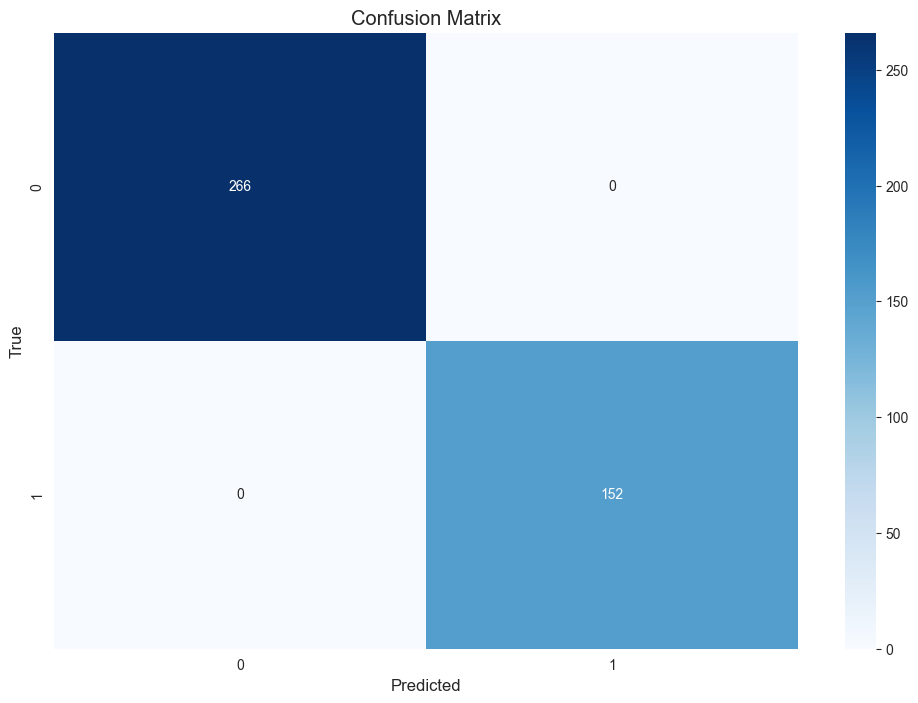

In [297]:
# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()